## imports

In [56]:
import numpy as np
import matplotlib.pyplot as plt

### sigmoid function
sigmoid function determines the output of a single neuron
based on weight and bias values


In [57]:
def sigmoid(x):
    # example activation function: f(x) = 1 / (1 + e ^ (-x))
    return 1 / (1 + np.exp(-x))

### derivative of sigmoid function

part of the differential equeation that helps in backpropagation
and determines training of the network and loss calculation (i.e. 
gradient descent)

In [58]:
def deriv_sigmoid(x):
    # pass sigmoid function above 
    fx = sigmoid(x)
    return fx * (1 - fx)

### function for calculating loss value

calculates loss from y_true and y_pred, which are numpy arrays of the same length. 
take the difference of each true and pred value,calculates loss from y_true and y_pred, which are numpy arrays of the same length. 
take the difference of each true and pred value, square it, then calculate mean. 

(i.e. function of loss value in logistic regression (meselegn) )

it is known as mean squared error --- not to be confused with root mean square

In [59]:
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

### Neural network

In [60]:
# two arrays to store data from the neural network,
# we will need them later to plot a graph

time_index = []
losses = []

**Neural Network class:**

A neural network with: 
- 2 inputs
- 1 hidden layer (with 2 neurons n1 and n2)
- an output layer with one neuron (o1)

Each neuron has the same weights and bias (for the sake of simplicity)

`w = [0, 1], b = 0`

In [91]:
class NeuralNetwork:
    def __init__(self):
        # hidden neuron 1
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()

        # hidden neuron 2
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()

        # output neuron
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # biases:
        self.b1 = np.random.normal()    # hidden neuron 1
        self.b2 = np.random.normal()   # hidden neuron 2
        self.b3 = np.random.normal()   # output neuron

    def feedforward(self, x):
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)

        return o1

    def determine(self, sigmoid):
        return sigmoid > 0.5

    def predict(self, x):
        return self.determine(self.feedforward(x))

    def train(self, data, all_y_trues):
        '''
            data is a (n * 2) numpy array, where n = number of samples in dataset
            all_y_trues is a numpy array with n elements

            Elements in all_y_trues correspond to those in the data
        '''

        learn_rate = 0.1
        epochs = 1000    # number of times to iterate loop
        graph_plot = 0

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # do feed forward

                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] * self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)

                y_pred = o1

                # back propagation
                # calculate partial derivatives
                # calculate partial derivatives
                # naming: d_L_d_w1 represents "partial L / partial w1"
                d_L_d_ypred = -2 * (y_true - y_pred)

                # neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                # gradient descent of sorts
                # update weights and biases

                # neuron h1
                self.w1 = self.w1 - learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 = self.w2 - learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 = self.b1 - learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # neuron h2
                self.w3 = self.w3 - learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 = self.w4 - learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 = self.b2 - learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # neuron o1
                self.w5 = self.w5 - learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 = self.w6 - learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 = self.b3 - learn_rate * d_L_d_ypred * d_ypred_d_b3

                # calculate total loss at eht end of each epoch
                if epoch % 10 == 0:
                    time_index.append(epoch)
                    y_preds = np.apply_along_axis(self.feedforward, 1, data)
                    loss = mse_loss(all_y_trues, y_preds)
                    losses.append(loss)
                    print("Epoch %d loss: %.3f" % (epoch, loss))
                    print("w1 %.3f\tw2 %.3f\tb1 %.3f" % (self.w1, self.w2, self.b1))
                    print("w3 %.3f\tw4 %.3f\tb2 %.3f" % (self.w3, self.w4, self.b2))
                    print("w5 %.3f\tw6 %.3f\tb3 %.3f" % (self.w5, self.w6, self.b3))
                while len(losses) < len(time_index):
                    losses.append(default_value)
print(len(losses))
print(len(time_index))


1200
1200


### Preparing data and training

**define example dataset:**

In [92]:
data = np.array([
    [-2, -1],    # betty
    [25, 6],     # dany
    [17, 4],     # abdisa
    [-15, -6]    # helen
])

all_y_trues = np.array([ #1 represents female, 0 represents male
    1, # betty
    0, # dani
    0, # abdisa
    1, # helen
])

### train the network


In [93]:
network = NeuralNetwork()
network.train(data, all_y_trues)



Epoch 0 loss: 0.284
w1 0.384	w2 0.491	b1 -1.624
w3 1.205	w4 -0.318	b2 -0.436
w5 0.411	w6 -1.492	b3 -1.032
Epoch 0 loss: 0.284
w1 0.384	w2 0.491	b1 -1.624
w3 1.205	w4 -0.318	b2 -0.436
w5 0.408	w6 -1.494	b3 -1.034
Epoch 0 loss: 0.284
w1 0.384	w2 0.491	b1 -1.624
w3 1.205	w4 -0.318	b2 -0.436
w5 0.406	w6 -1.496	b3 -1.036
Epoch 0 loss: 0.281
w1 0.384	w2 0.491	b1 -1.624
w3 1.205	w4 -0.318	b2 -0.436
w5 0.406	w6 -1.496	b3 -1.007
Epoch 10 loss: 0.213
w1 0.372	w2 0.485	b1 -1.618
w3 1.262	w4 -0.261	b2 -0.465
w5 0.367	w6 -1.531	b3 -0.506
Epoch 10 loss: 0.213
w1 0.372	w2 0.485	b1 -1.618
w3 1.262	w4 -0.261	b2 -0.465
w5 0.363	w6 -1.535	b3 -0.510
Epoch 10 loss: 0.213
w1 0.372	w2 0.485	b1 -1.618
w3 1.262	w4 -0.261	b2 -0.465
w5 0.359	w6 -1.539	b3 -0.515
Epoch 10 loss: 0.210
w1 0.372	w2 0.485	b1 -1.618
w3 1.262	w4 -0.261	b2 -0.465
w5 0.359	w6 -1.539	b3 -0.485
Epoch 20 loss: 0.155
w1 0.362	w2 0.480	b1 -1.613
w3 1.315	w4 -0.208	b2 -0.492
w5 0.279	w6 -1.617	b3 -0.048
Epoch 20 loss: 0.156
w1 0.362	w2 0.480	b1

In [94]:
# convert results to np arrays
x_axis = np.array(time_index)

y_axis = np.array(losses)


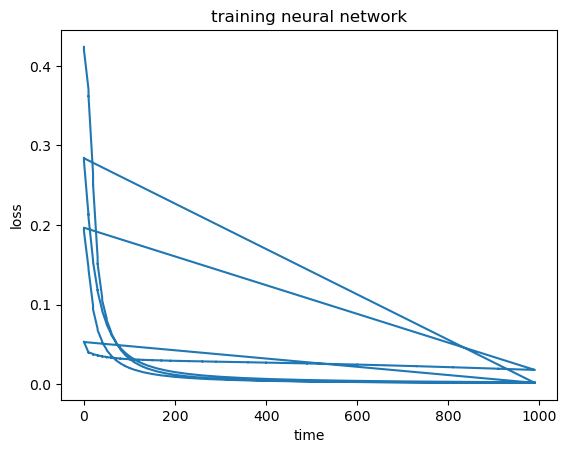

In [95]:
plt.plot(x_axis, y_axis)
plt.xlabel('time')
plt.ylabel('loss')

plt.title('training neural network')
plt.show()



### make predictions with the model

We can now use the network to predict genders:

In [98]:
samrawit = np.array([-7, -3])
abel = np.array([20, 2])

print("samrawit: %.3f " % network.predict(samrawit))
print("abel: %.3f " % network.predict(abel))

samrawit: 1.000 
abel: 0.000 


In [99]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.predict(emily)) # 0.951 - F
print("Frank: %.3f" % network.predict(frank)) # 0.039 - M

Emily: 1.000
Frank: 0.000
